In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Number Recognition with KMeans

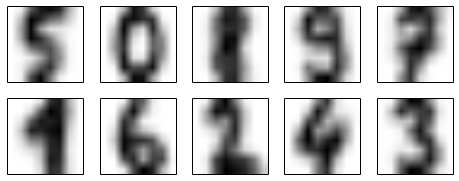

In [2]:
digits = load_digits()

est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)

fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 156   0   2   0   6   7  12]
 [  0   7   0   0 163   0   0   9   2   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   2   0   7   2   3 101  50]
 [  0  20   0   6   0   7   0   8   0 139]]


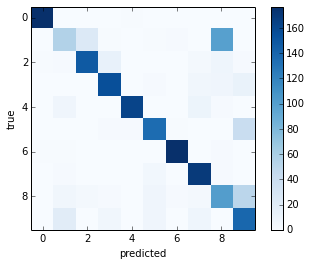

In [3]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i) 
    labels[mask] = mode(digits.target[mask])[0]

print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [4]:
accuracy_score(digits.target, labels)

0.79131886477462432

# Number Recognition with SVM

In [5]:
digits = load_digits(10)
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target)
estimator = LinearSVC(C=1.0)
estimator.fit(data_train, label_train)
label_predict = estimator.predict(data_test)

[[42  0  0  0  0  1  0  0  0  0]
 [ 0 40  0  1  0  1  0  0  2  0]
 [ 0  2 41  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  1  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  1  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 1  0  0  2  0  2  0  0  1 37]]


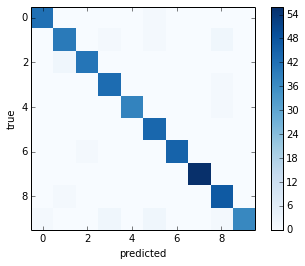

In [6]:
print confusion_matrix(label_test, label_predict)

plt.imshow(confusion_matrix(label_test, label_predict),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [7]:
accuracy_score(label_test, label_predict)

0.9622222222222222

# Number Recognition with RandomForest

In [14]:
clf=RandomForestClassifier(n_estimators=200, min_samples_split=1)
digits = load_digits(10)
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target)
clf.fit(data_train, label_train)
label_predict = clf.predict(data_test)

[[46  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  2  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  0  0  0  0  1 46  0  1  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  1  1  1  0  0  0  1 39  0]
 [ 0  0  0  2  0  0  0  0  1 42]]


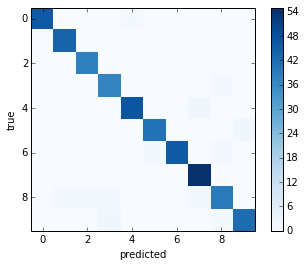

In [15]:
print confusion_matrix(label_test, label_predict)

plt.imshow(confusion_matrix(label_test, label_predict),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [16]:
accuracy_score(label_test, label_predict)

0.96666666666666667

# Number Recognition with PCA and KMeans

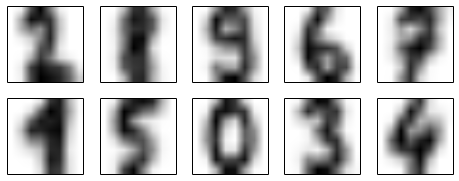

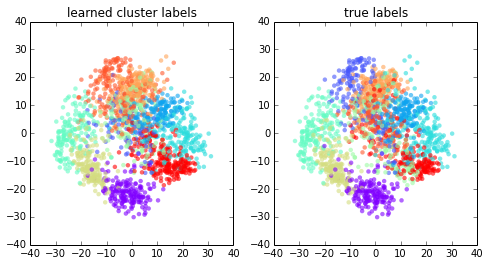

In [11]:
digits = load_digits()
X = digits.data
y = digits.target
target_names = digits.target_names
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
est = KMeans(n_clusters=10)
est.fit(X)
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i) 
    labels[mask] = mode(digits.target[mask])[0]
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X_r[:, 0], X_r[:, 1],c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X_r[:, 0], X_r[:, 1], c=y, **kwargs)
ax[1].set_title('true labels');

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 156   0   2   0   6   7  12]
 [  0   7   0   0 163   0   0   9   2   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   2   0   7   2   3 101  50]
 [  0  20   0   6   0   7   0   8   0 139]]


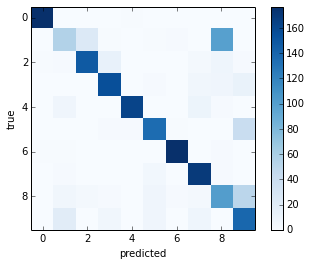

In [12]:
print confusion_matrix(y, labels)

plt.imshow(confusion_matrix(y, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

In [13]:
accuracy_score(y, labels)

0.79131886477462432